# Importing Libraries and Data Wrangling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint, uniform

In [ ]:
#df = pd.read_csv("../data/ecommerce_fraud_lite.csv")
df = pd.read_csv("../data/ecommerce_fraud.csv")

In [4]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [5]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


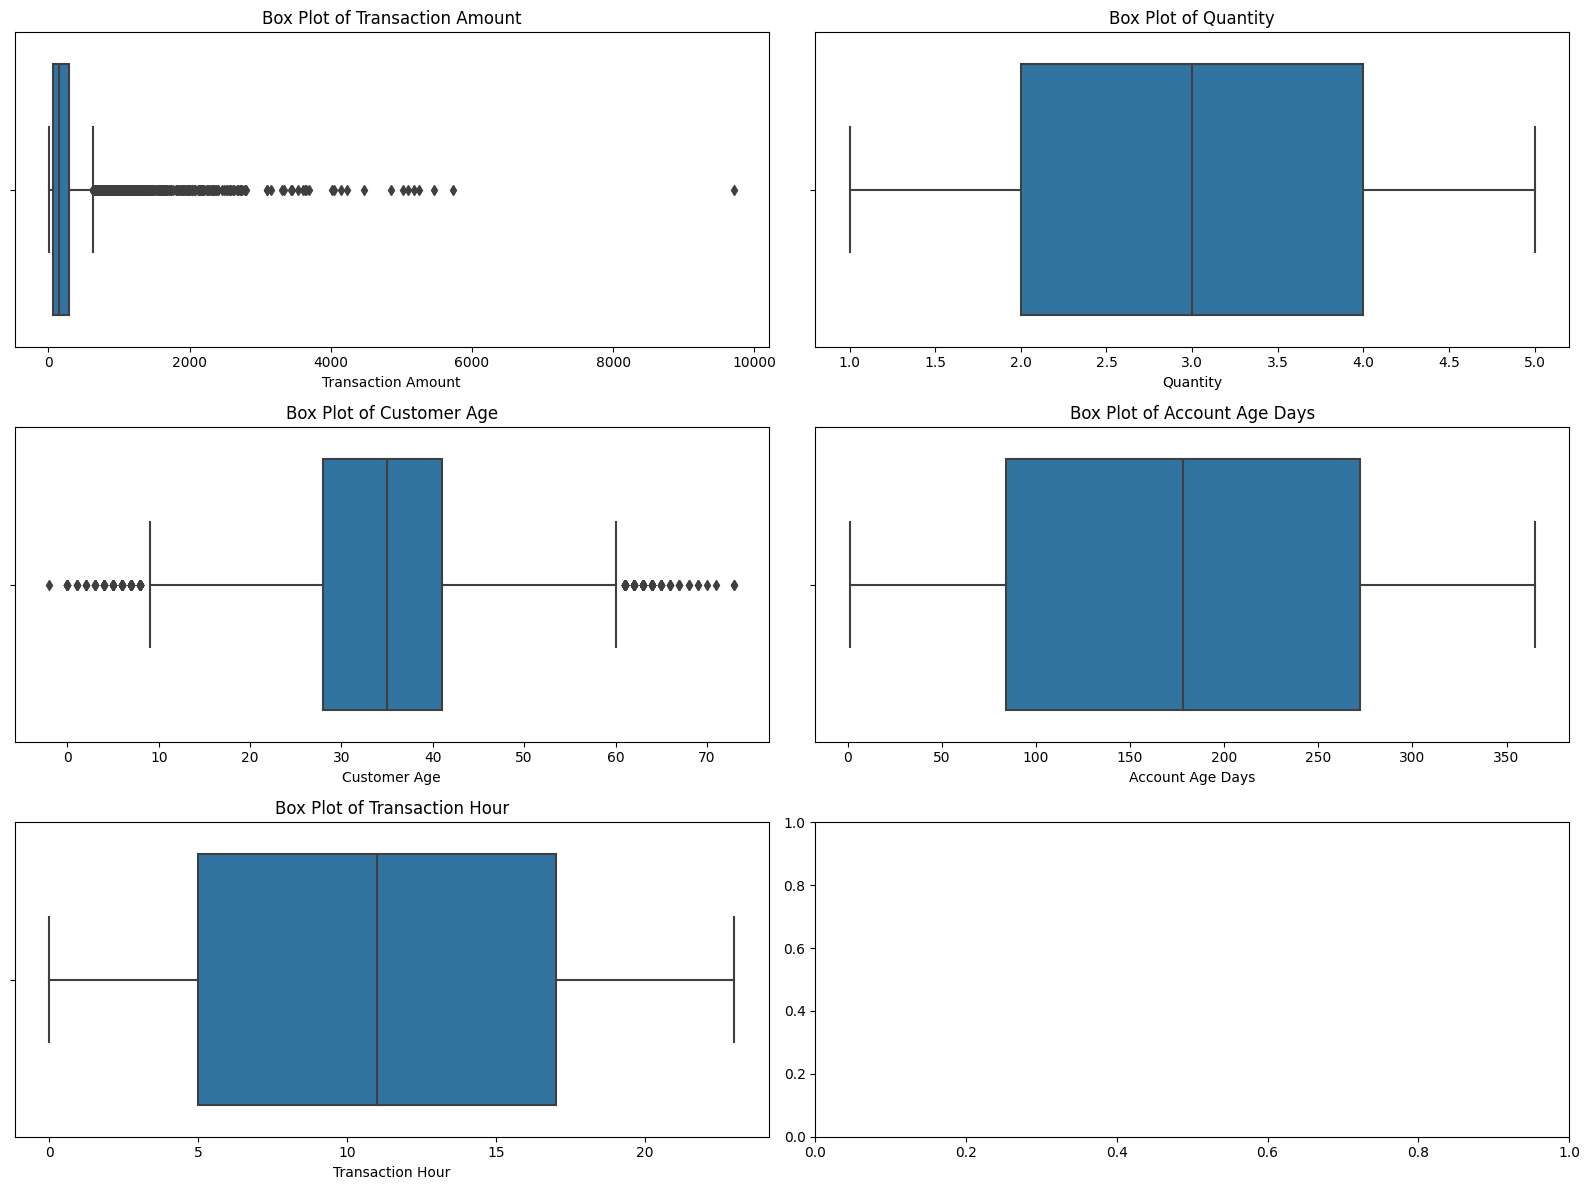

In [6]:
features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [8]:
mean_age = df['Customer Age'].mean()
df.loc[df['Customer Age'] < 10, 'Customer Age'] = mean_age

/tmp/ipykernel_35/931540537.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34.56020986714056' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Customer Age'] < 10, 'Customer Age'] = mean_age


In [9]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.741608,0.051705,178.660531,11.266015
std,282.046669,1.419663,9.746543,0.221436,107.388682,6.980659
min,10.000000,1.000000,10.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [10]:
df['Address Match'] = (df['Shipping Address'] == df['Billing Address']).astype(int)
df = df.drop(["Transaction ID",'Customer Location',"Shipping Address","Billing Address"], axis=1)

# Exploratory Data Analysis

## Features Understanding

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


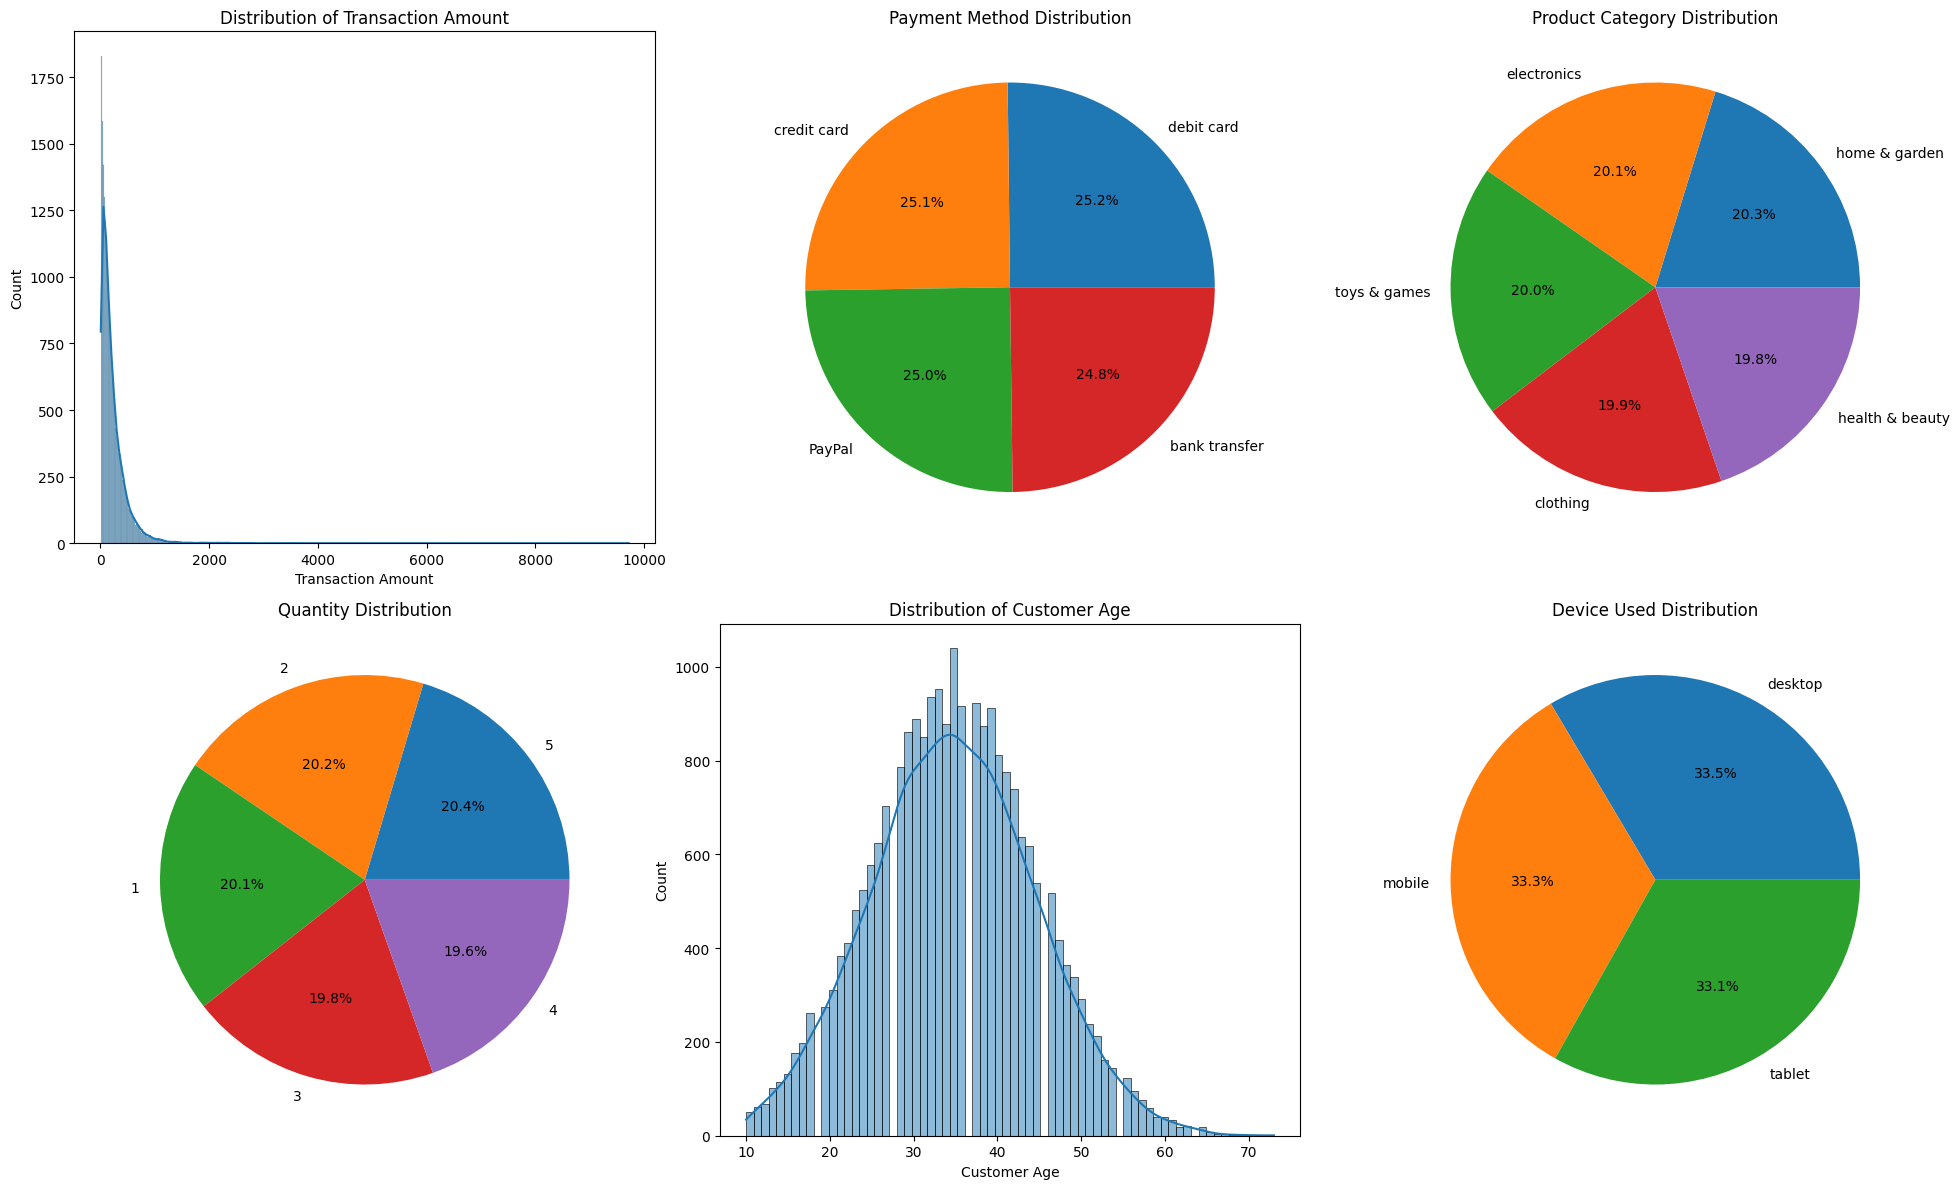

In [11]:
# Create a figure with subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

axes = axes.flatten()

# 1. Transaction Amount Distribution (Histogram)
sns.histplot(df['Transaction Amount'], kde=True, ax=axes[0])
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Transaction Amount')

# 2. Payment Method Distribution (Pie)
payment_counts = df['Payment Method'].value_counts()
axes[1].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
axes[1].set_title('Payment Method Distribution')

# 3. Product Category Distribution (Pie)
product_counts = df['Product Category'].value_counts()
axes[2].pie(product_counts, labels=product_counts.index, autopct='%1.1f%%')
axes[2].set_title('Product Category Distribution')

# 4. Quantity Distribution (Pie)
quantity_counts = df['Quantity'].value_counts()
axes[3].pie(quantity_counts, labels=quantity_counts.index, autopct='%1.1f%%')
axes[3].set_title('Quantity Distribution')

# 5. Customer Age Distribution (Histogram)
sns.histplot(df['Customer Age'], kde=True, ax=axes[4])
axes[4].set_xlabel('Customer Age')
axes[4].set_ylabel('Count')
axes[4].set_title('Distribution of Customer Age')

# 6. Device Used Distribution (Pie)
device_counts = df['Device Used'].value_counts()
axes[5].pie(device_counts, labels=device_counts.index, autopct='%1.1f%%')
axes[5].set_title('Device Used Distribution')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


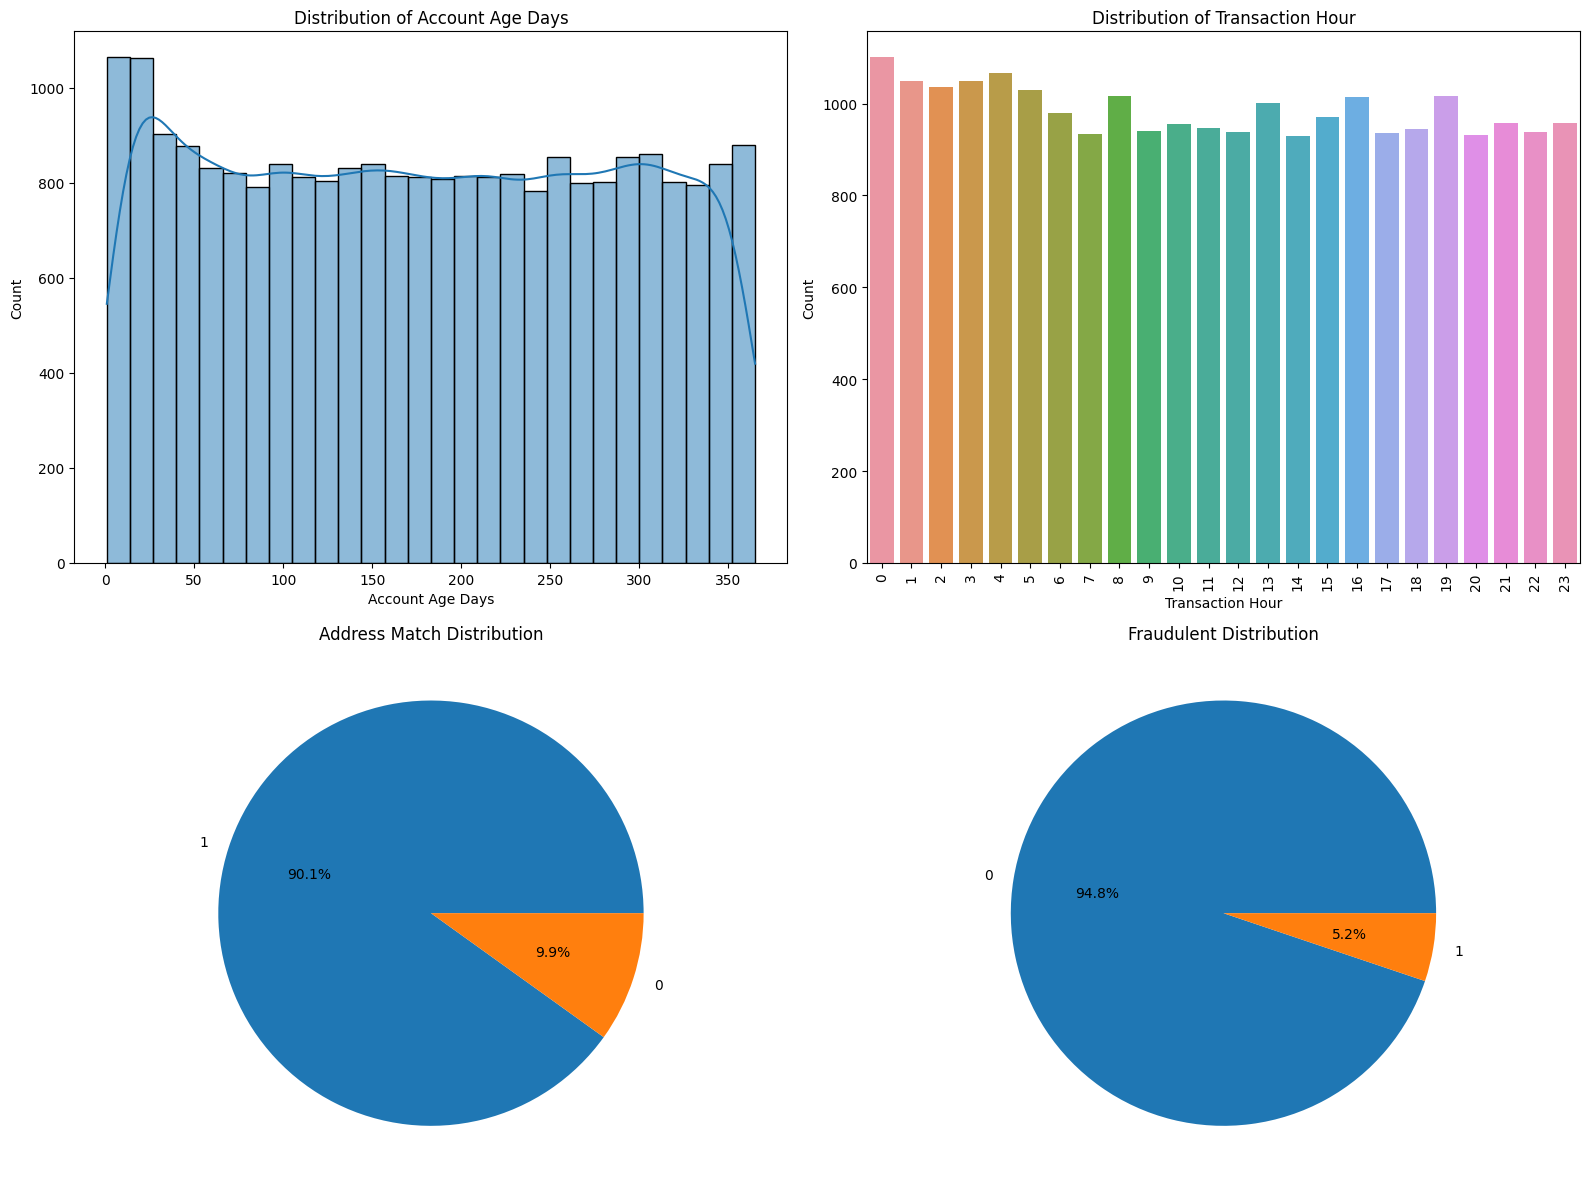

In [12]:
# Create a figure with subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array to access them as axes[0], axes[1], etc.
axes = axes.flatten()

# 1. Account Age Days (Histogram)
sns.histplot(df['Account Age Days'], kde=True, ax=axes[0])
axes[0].set_xlabel('Account Age Days')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Account Age Days')

# 2. Transaction Hour (Countplot)
sns.countplot(x='Transaction Hour', data=df, ax=axes[1])
axes[1].set_xlabel('Transaction Hour')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Transaction Hour')
# Rotate x-labels for better visibility if needed
axes[1].tick_params(axis='x', rotation=90)

# 3. Address Match (Pie Chart)
match_counts = df['Address Match'].value_counts()
axes[2].pie(match_counts, labels=match_counts.index, autopct='%1.1f%%')
axes[2].set_title('Address Match Distribution')

# 4. Is Fraudulent (Pie Chart)
fraud_counts = df['Is Fraudulent'].value_counts()
axes[3].pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
axes[3].set_title('Fraudulent Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Features Relationship

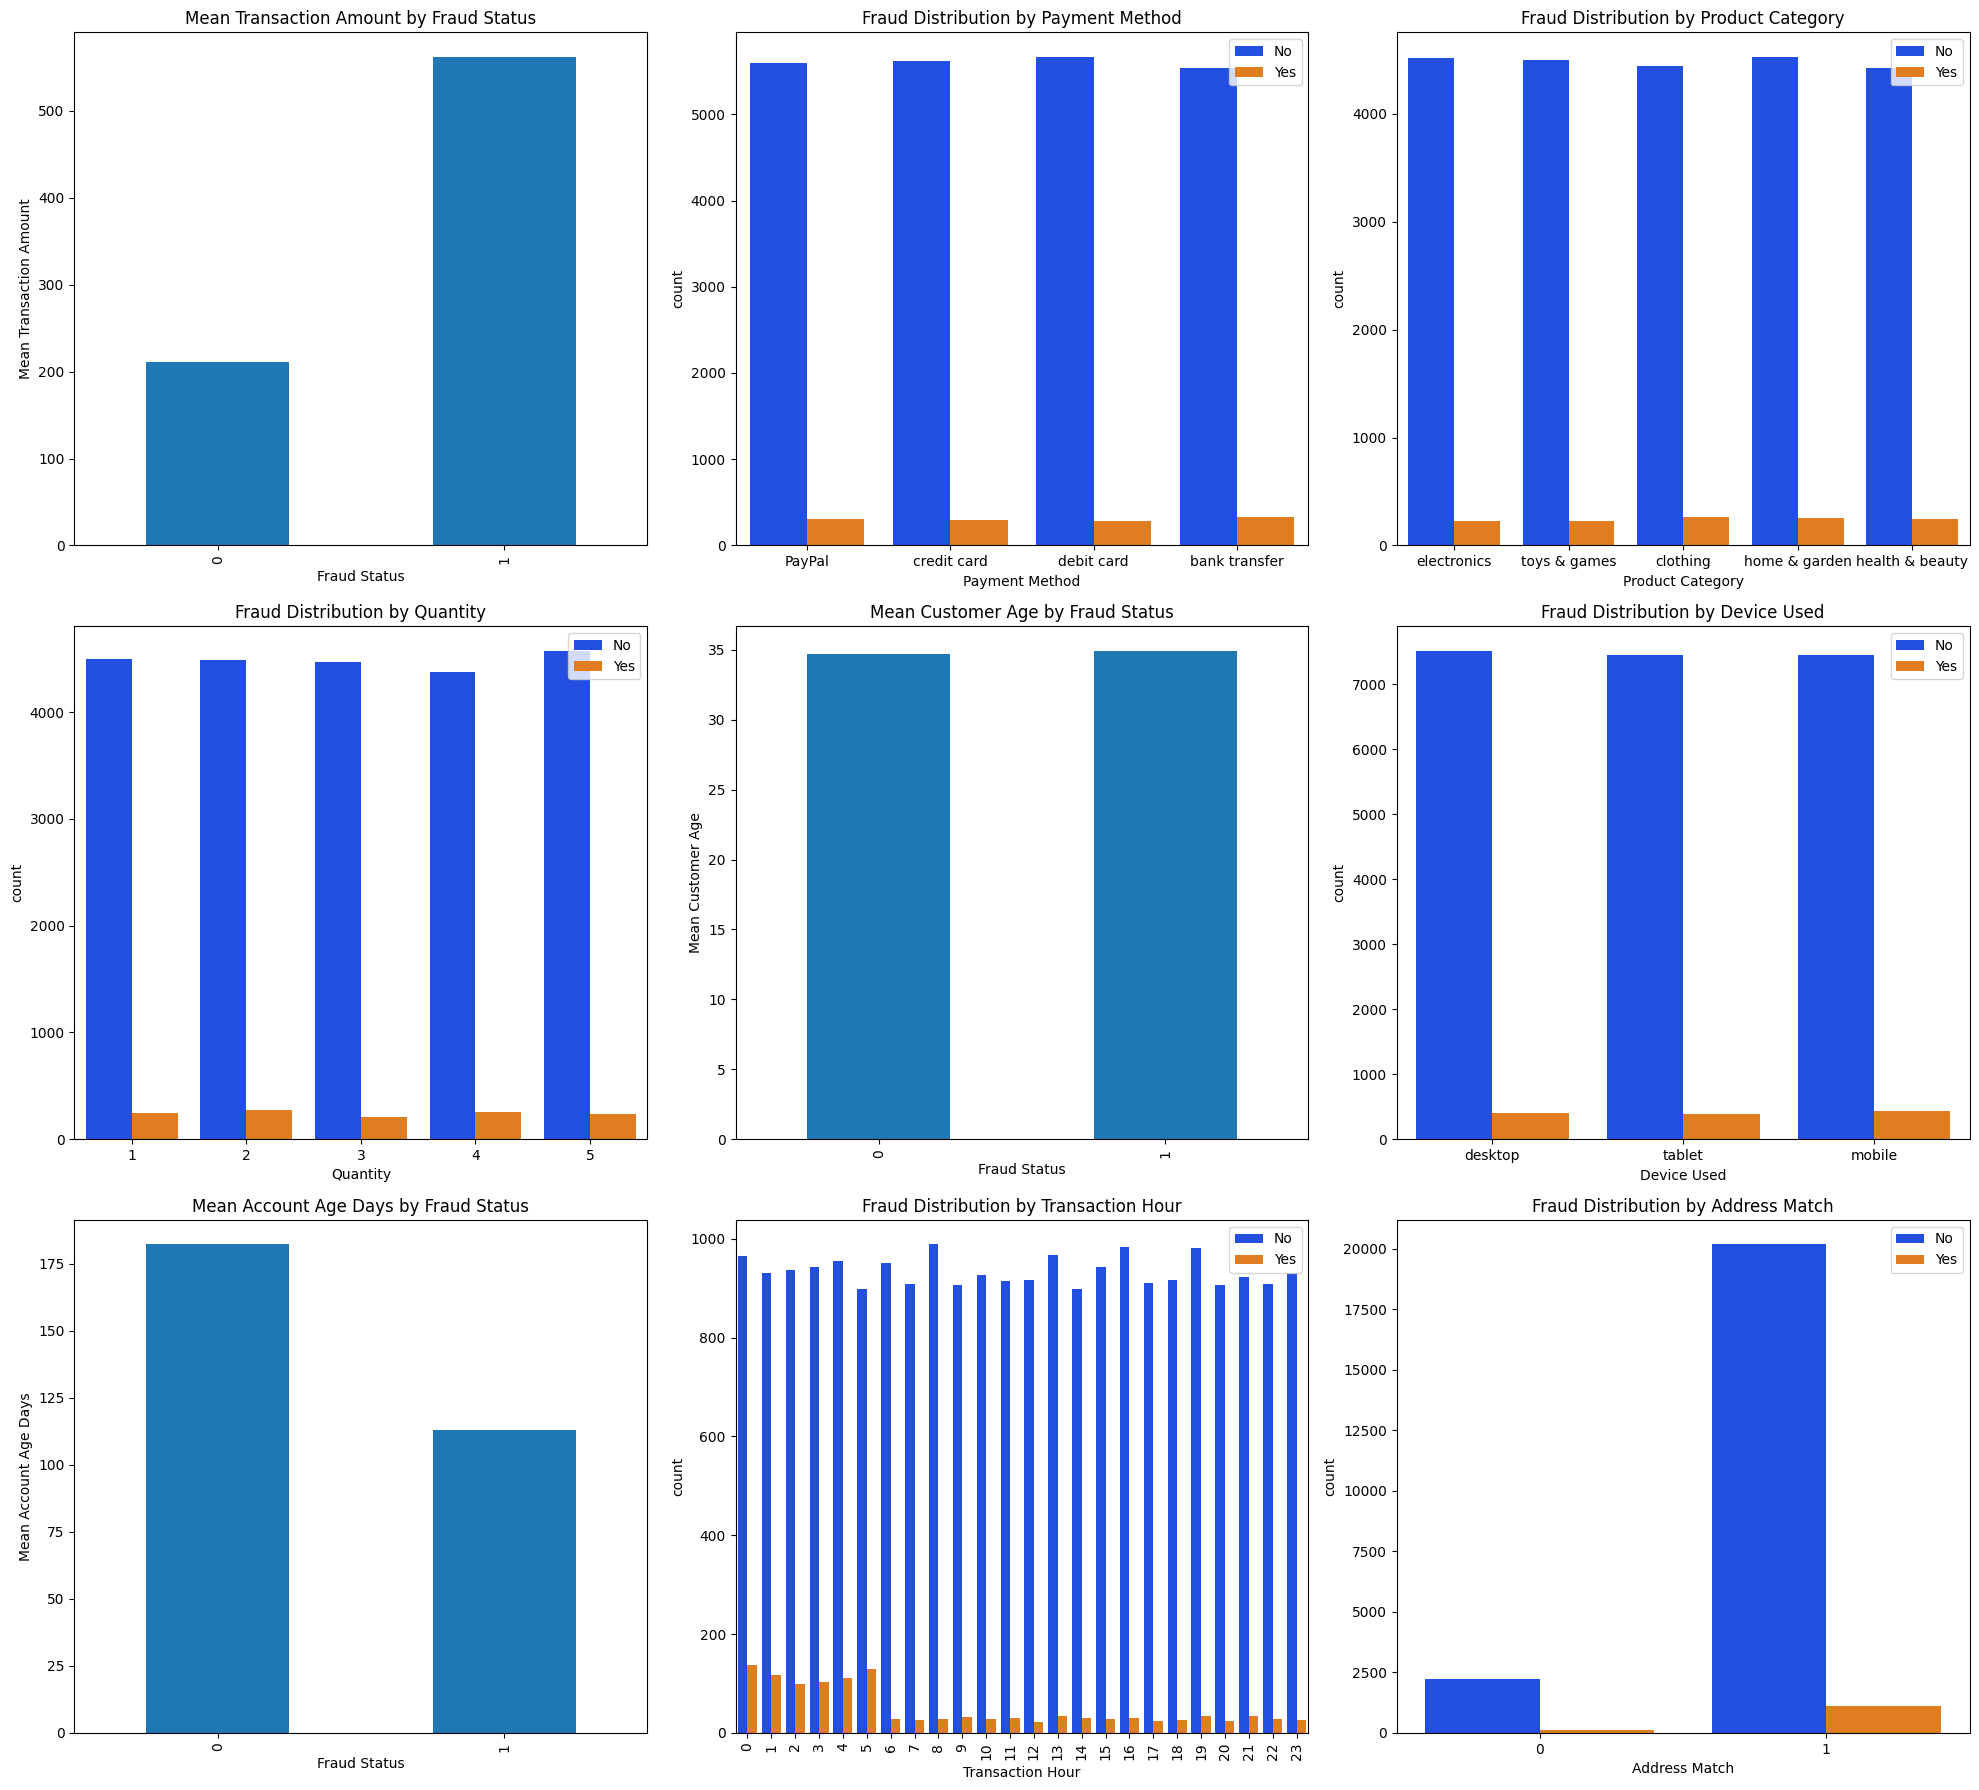

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure fraud_groups is defined (assuming grouping by the target variable)
fraud_groups = df.groupby('Is Fraudulent')

# Create a figure with subplots: 3 rows, 3 columns
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# Flatten axes to access them easily as axes[0] to axes[8]
axes = axes.flatten()

# --- ROW 1 ---

# 1. Mean Transaction Amount (Bar Plot)
feature_mean_amount = fraud_groups['Transaction Amount'].mean()
feature_mean_amount.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Mean Transaction Amount')
axes[0].set_title('Mean Transaction Amount by Fraud Status')

# 2. Payment Method (Count Plot)
sns.countplot(x="Payment Method", data=df, palette='bright', hue='Is Fraudulent', ax=axes[1])
axes[1].legend(['No', 'Yes'])
axes[1].set_title('Fraud Distribution by Payment Method')

# 3. Product Category (Count Plot)
sns.countplot(x="Product Category", data=df, palette='bright', hue='Is Fraudulent', ax=axes[2])
axes[2].legend(['No', 'Yes'])
axes[2].set_title('Fraud Distribution by Product Category')

# --- ROW 2 ---

# 4. Quantity (Count Plot)
sns.countplot(x="Quantity", data=df, palette='bright', hue='Is Fraudulent', ax=axes[3])
axes[3].legend(['No', 'Yes'])
axes[3].set_title('Fraud Distribution by Quantity')

# 5. Mean Customer Age (Bar Plot)
feature_mean_age = fraud_groups['Customer Age'].mean()
feature_mean_age.plot(kind='bar', ax=axes[4])
axes[4].set_xlabel('Fraud Status')
axes[4].set_ylabel('Mean Customer Age')
axes[4].set_title('Mean Customer Age by Fraud Status')

# 6. Device Used (Count Plot)
sns.countplot(x="Device Used", data=df, palette='bright', hue='Is Fraudulent', ax=axes[5])
axes[5].legend(['No', 'Yes'])
axes[5].set_title('Fraud Distribution by Device Used')

# --- ROW 3 ---

# 7. Mean Account Age Days (Bar Plot)
feature_mean_acct = fraud_groups['Account Age Days'].mean()
feature_mean_acct.plot(kind='bar', ax=axes[6])
axes[6].set_xlabel('Fraud Status')
axes[6].set_ylabel('Mean Account Age Days')
axes[6].set_title('Mean Account Age Days by Fraud Status')

# 8. Transaction Hour (Count Plot)
sns.countplot(x="Transaction Hour", data=df, palette='bright', hue='Is Fraudulent', ax=axes[7])
axes[7].legend(['No', 'Yes'])
axes[7].set_title('Fraud Distribution by Transaction Hour')
axes[7].tick_params(axis='x', rotation=90) # Rotate labels for better readability

# 9. Address Match (Count Plot)
sns.countplot(x="Address Match", data=df, palette='bright', hue='Is Fraudulent', ax=axes[8])
axes[8].legend(['No', 'Yes'])
axes[8].set_title('Fraud Distribution by Address Match')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

The plots is not giving enough information because the fraudulent transaction is very small than the non fraudulent transaction. But we can quite identify distict profiles of customers who are more likely to be involved in fraudulent transactions.
- Firstly we can see on the plot where the mean of the transaction is estimated above 220$ is more likely to identify as fraudulent
- then we can see, if the mean of the account age is below 125 days will be identify as fraudulent
- and lastly we can see the fraudulent transaction is most likely in hour 0 to 5

## Feature Engineering

In [14]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Customer ID',
 'Transaction Date',
 'Payment Method',
 'Product Category',
 'Device Used',
 'IP Address']

In [15]:
print(df['Payment Method'].nunique(),df['Product Category'].nunique(),df['Device Used'].nunique())

4 5 3


In [16]:
df = pd.get_dummies(df, columns=['Payment Method',
 'Product Category',
 'Device Used'], drop_first=True)

In [17]:
numeric_features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()

,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,IP Address,Is Fraudulent,Account Age Days,Transaction Hour,Address Match,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_mobile,Device Used_tablet
0,8ca9f102-02a4-4207-ab63-484e83a1bdf0,-0.663192,2024-03-24 23:42:43,-1.409202,0.539525,110.87.246.85,0,0.962314,1.680964,1,False,False,False,True,False,False,False,False,False
1,4d158416-caae-4b09-bd5b-15235deb9129,0.255186,2024-01-22 00:53:31,-0.000387,0.026512,14.73.104.153,0,0.412896,-1.613924,1,False,True,False,True,False,False,False,False,True
2,ccae47b8-75c7-4f5a-aa9e-957deced2137,0.393393,2024-01-22 08:06:03,1.408427,-0.589104,67.58.94.93,0,1.688663,-0.467876,0,False,False,True,False,False,False,True,False,False
3,b04960c0-aeee-4907-b1cd-4819016adcef,-0.473680,2024-01-16 20:34:53,1.408427,1.052538,202.122.126.216,0,1.362737,1.251196,1,False,True,False,True,False,False,False,True,False
4,de9d6351-b3a7-4bc7-9a55-8f013eb66928,-0.538635,2024-01-16 15:47:23,1.408427,0.744730,96.77.232.76,0,-0.583505,0.534916,1,False,True,False,False,False,False,False,False,False


In [18]:
import polars as pl
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Convert Pandas → Polars
pdf = pl.from_pandas(df)

# 🔹 CRITICAL: global sort
pdf = pdf.sort(["Customer ID", "Transaction Date"])

# ================================
# 1️⃣ Rolling Time-Window Features
# ================================
rolling_1h = (
    pdf.group_by_rolling(
        index_column="Transaction Date",
        period="1h",
        by="Customer ID",
        closed="left"
    )
    .agg(pl.count().alias("Txn_Count_1H"))
)

rolling_24h = (
    pdf.group_by_rolling(
        index_column="Transaction Date",
        period="24h",
        by="Customer ID",
        closed="left"
    )
    .agg(pl.col("Transaction Amount").sum().alias("Txn_Sum_24H"))
)

# Join back
pdf = pdf.join(rolling_1h, on=["Customer ID", "Transaction Date"], how="left")
pdf = pdf.join(rolling_24h, on=["Customer ID", "Transaction Date"], how="left")

# ================================
# 2️⃣ Expanding (Cumulative) Stats
# ================================
pdf = pdf.with_columns([
    pl.col("Transaction Amount")
      .cum_sum()
      .over("Customer ID")
      .alias("cum_sum"),

    pl.col("Transaction Amount")
      .cum_count()
      .over("Customer ID")
      .alias("cum_count")
])

pdf = pdf.with_columns(
    (pl.col("cum_sum") / pl.col("cum_count"))
      .fill_nan(0)
      .alias("Customer_Avg_Amount")
)

# ================================
# 3️⃣ Distinct Counts (safe)
# ================================
pdf = pdf.with_columns([
    pl.col("IP Address").n_unique().over("Customer ID").alias("IPs_per_Customer"),
    pl.col("Customer ID").n_unique().over("IP Address").alias("Customers_per_IP"),
])

# ================================
# 4️⃣ Ratios & Flags
# ================================
pdf = pdf.with_columns([
    (pl.col("Transaction Amount") / pl.col("Customer_Avg_Amount")).alias("Amount_vs_Avg"),
    (pl.col("Customers_per_IP") > 5).cast(pl.Int8).alias("Is_Shared_IP")
])

# Cleanup temp columns
pdf = pdf.drop(["cum_sum", "cum_count"])

# Convert back
df = pdf.drop(['Customer ID', 'IP Address']).to_pandas()
df['Risk_New_High_Spend'] = df['Transaction Amount'] / (df['Account Age Days'] + 1)


/tmp/ipykernel_35/2063721966.py:14: DeprecationWarning: `group_by_rolling` is deprecated. It has been renamed to `rolling`.
  pdf.group_by_rolling(
/tmp/ipykernel_35/2063721966.py:20: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("Txn_Count_1H"))
/tmp/ipykernel_35/2063721966.py:24: DeprecationWarning: `group_by_rolling` is deprecated. It has been renamed to `rolling`.
  pdf.group_by_rolling(


In [19]:
# 1. Price per Item (Are they buying expensive singular items?)
df['Amount_per_Item'] = df['Transaction Amount'] / df['Quantity']

# 4. Mismatch Severity (High Value + Address Mismatch = High Risk)
df['Risk_Mismatch'] = df['Transaction Amount'] * (1 - df['Address Match'])

import numpy as np
import pandas as pd

# 1. Setup: Ensure Transaction Date is a proper datetime object
# ==============================================================================
# STEP 1: EXTRACT RAW TEMPORAL FEATURES
# ==============================================================================
# We extract these temporarily to perform the math
df['Month'] = df['Transaction Date'].dt.month
df['Day']   = df['Transaction Date'].dt.day
df['Hour']  = df['Transaction Date'].dt.hour
df['DayOfWeek'] = df['Transaction Date'].dt.dayofweek

# ==============================================================================
# STEP 2: CYCLICAL ENCODING (The "Circle" Logic)
# ==============================================================================

def encode_cyclical(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

# Apply to Month (12 cycle)
df = encode_cyclical(df, 'Month', 12)

# Apply to Day of Month (31 cycle)
df = encode_cyclical(df, 'Day', 31)

# Apply to Hour (24 cycle)
df = encode_cyclical(df, 'Hour', 24)

# Apply to Day of Week (7 cycle) - Optional but highly recommended for retail fraud
df = encode_cyclical(df, 'DayOfWeek', 7)

# ==============================================================================
# STEP 3: CLEANUP (Drop the Raw Columns)
# ==============================================================================
# We remove the original Date and the raw numbers (1-12, 0-23) to prevent noise
cols_to_drop = ['Month', 'Day', 'Hour', 'DayOfWeek', 'Transaction Hour', 'IP Address', 'Customer ID', "Account Age Days"]

# Note: Check if you need 'Transaction Date' for splitting data (Train/Test) 
# BEFORE you drop it. If you've already split your data, it's safe to drop.
df = df.drop(columns=cols_to_drop, errors='ignore')

# Verify the new columns
print("New Cyclical Features:")
print([col for col in df.columns if '_sin' in col or '_cos' in col])

New Cyclical Features:
['Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos']


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Transaction Amount                23634 non-null  float64       
 1   Transaction Date                  23634 non-null  datetime64[ns]
 2   Quantity                          23634 non-null  float64       
 3   Customer Age                      23634 non-null  float64       
 4   Is Fraudulent                     23634 non-null  int64         
 5   Address Match                     23634 non-null  int64         
 6   Payment Method_bank transfer      23634 non-null  bool          
 7   Payment Method_credit card        23634 non-null  bool          
 8   Payment Method_debit card         23634 non-null  bool          
 9   Product Category_electronics      23634 non-null  bool          
 10  Product Category_health & beauty  23634 non-nu

# Modeling the data

## Handling Imbalance

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Sort strictly by time. This is the heart of fraud validation.
df = df.sort_values('Transaction Date')

# 2. DEFINE FEATURES (X) AND TARGET (y)
# We drop the Date (used for sorting) and the Target.
# Note: If you have 'Transaction ID', drop that too.
X = df.drop(columns=['Is Fraudulent', 'Transaction Date'])
y = df['Is Fraudulent']

# 3. TIME-BASED SPLIT
# shuffle=False is MANDATORY here.
# It takes the first 80% of rows (oldest) for Train, last 20% (newest) for Test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Training on {X_train.shape[0]} past transactions.")
print(f"Testing on {X_test.shape[0]} future transactions.")

# 4. HYBRID RESAMPLING PIPELINE
# We only resample the Training data. The Test data stays "imbalanced" (real).
# 4. HYBRID RESAMPLING PIPELINE
# Calculate the weight based on your training data counts
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, average_precision_score

# Define the models
models = {
    "XGBoost": XGBClassifier(
        n_estimators=200, learning_rate=0.05, max_depth=6, 
        scale_pos_weight=5, random_state=42, n_jobs=-1
    ),
    
    "LightGBM": LGBMClassifier(
        n_estimators=200, learning_rate=0.05, max_depth=6,
        class_weight='balanced', # LightGBM handles weights automatically
        random_state=42, n_jobs=-1, verbose=-1
    ),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=10, # RF needs deeper trees
        class_weight='balanced',        # crucial for fraud
        random_state=42, n_jobs=-1
    )
}

# Loop through and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Score
    pr_auc = average_precision_score(y_test, y_prob)
    print(f"--- {name} Results ---")
    print(f"PR-AUC Score: {pr_auc:.4f}")
    
    # Print report for the minority class (Fraud) specifically
    # We look at row '1' for Fraud precision/recall
    report = classification_report(y_test, y_pred, output_dict=True)
    fraud_stats = report['1']
    print(f"Fraud Precision: {fraud_stats['precision']:.2f}")
    print(f"Fraud Recall:    {fraud_stats['recall']:.2f}")
    print(f"Fraud F1-Score:  {fraud_stats['f1-score']:.2f}")

Training on 18907 past transactions.
Testing on 4727 future transactions.

Training XGBoost...
--- XGBoost Results ---
PR-AUC Score: 0.2902
Fraud Precision: 0.39
Fraud Recall:    0.22
Fraud F1-Score:  0.28

Training LightGBM...
--- LightGBM Results ---
PR-AUC Score: 0.2954
Fraud Precision: 0.19
Fraud Recall:    0.52
Fraud F1-Score:  0.28

Training Random Forest...
--- Random Forest Results ---
PR-AUC Score: 0.2760
Fraud Precision: 0.34
Fraud Recall:    0.26
Fraud F1-Score:  0.29


In [39]:
from sklearn.ensemble import VotingClassifier

# 1. Define the specific models (using the params that worked best)
clf1 = XGBClassifier(
    n_estimators=2000, learning_rate=0.002, max_depth=6, 
    scale_pos_weight=9, random_state=42, n_jobs=-1, eval_metric='aucpr'
)

clf2 = LGBMClassifier(
    n_estimators=2000, learning_rate=0.002, max_depth=6,
    class_weight='balanced', random_state=42, n_jobs=-1, verbose=-1
)

# 2. Create the Ensemble (Soft Voting = Average of Probabilities)
ensemble = VotingClassifier(
    estimators=[('xgb', clf1), ('lgbm', clf2)],
    voting='soft',  # 'soft' averages the probability scores
    weights=[1, 1]  
)

print("Training Ensemble Model...")
ensemble.fit(X_train, y_train)

# 3. Evaluate
y_pred = ensemble.predict(X_test)
y_prob = ensemble.predict_proba(X_test)[:, 1]

print("\n--- Ensemble Results ---")
print(classification_report(y_test, y_pred))
print(f"PR-AUC Score: {average_precision_score(y_test, y_prob):.4f}")

Training Ensemble Model...

--- Ensemble Results ---
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      4481
           1       0.22      0.52      0.31       246

    accuracy                           0.88      4727
   macro avg       0.59      0.71      0.62      4727
weighted avg       0.93      0.88      0.90      4727

PR-AUC Score: 0.2928


# Conclusion

In [ ]:
import joblib

# 1. Define filenames
model_filename = 'model_wts/ecommerce_model_weights.pkl'
features_filename = 'model_wts/ecommerce_model_features.pkl'

# 2. Save the trained ensemble model
joblib.dump(ensemble, model_filename)

# 3. CRITICAL: Save the exact list of features used
# This prevents "Feature Mismatch" errors when you run the app later
joblib.dump(features, features_filename)
